In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# Load the datasets

In [3]:
train_data = pd.read_csv('customer_churn_dataset-training-master.csv')
test_data = pd.read_csv('customer_churn_dataset-testing-master.csv')


## Summary of the dataset

In [4]:
print("Training Data Overview:\n", train_data.head())
print("\nSummary Statistics:\n", train_data.describe())
print("\nInfo:\n", train_data.info())

Training Data Overview:
    CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.0  


In [5]:
print("\nMissing Values:\n", train_data.isnull().sum())


Missing Values:
 CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


# Churn class distribution

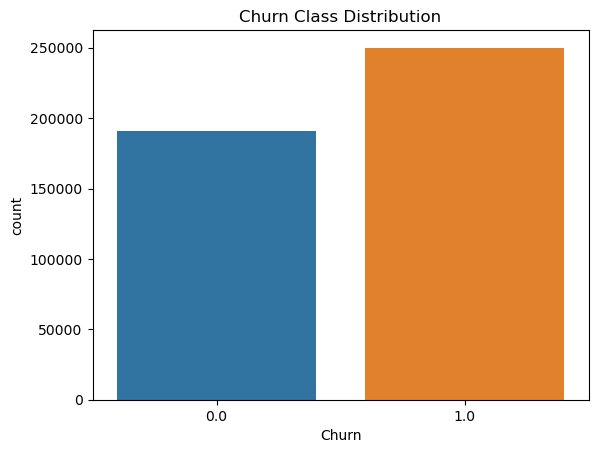

In [6]:
sns.countplot(x='Churn', data=train_data)
plt.title("Churn Class Distribution")
plt.show()

## Heatmap

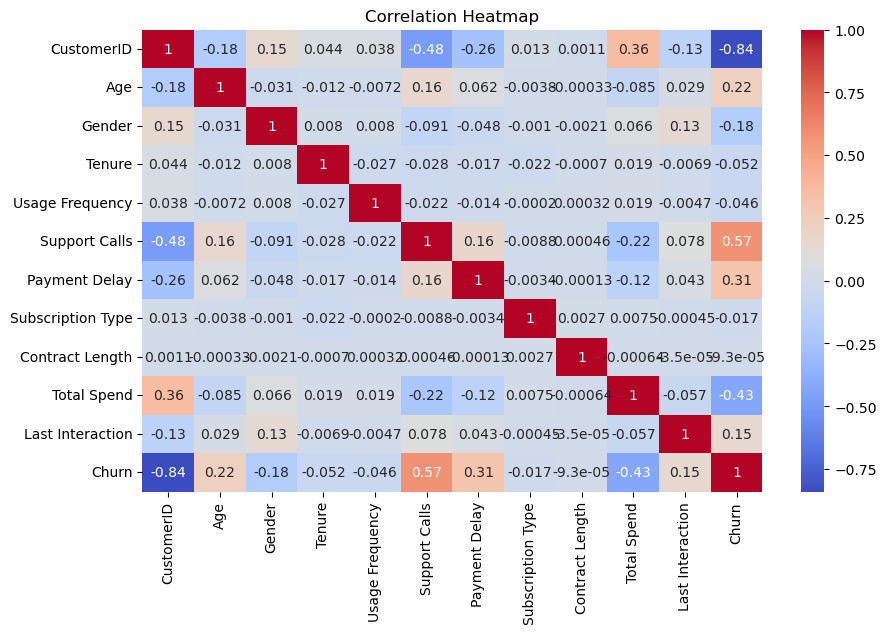

In [7]:
encoded_data = train_data.copy()

# Apply LabelEncoder or dummy encoding to categorical columns
for column in encoded_data.select_dtypes(include=['object']).columns:
    if column != 'Churn':  # Exclude the target variable for now
        le = LabelEncoder()
        encoded_data[column] = le.fit_transform(encoded_data[column])

plt.figure(figsize=(10, 6))
sns.heatmap(encoded_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# Step 3: Data Cleaning
# Handling missing values (Example: Fill missing with mean or drop rows)

In [8]:
numerical_columns = train_data.select_dtypes(include=['number']).columns
categorical_columns = train_data.select_dtypes(include=['object']).columns

train_data[numerical_columns] = train_data[numerical_columns].fillna(train_data[numerical_columns].mean())
test_data[numerical_columns] = test_data[numerical_columns].fillna(test_data[numerical_columns].mean())

train_data[categorical_columns] = train_data[categorical_columns].fillna(train_data[categorical_columns].mode().iloc[0])
test_data[categorical_columns] = test_data[categorical_columns].fillna(test_data[categorical_columns].mode().iloc[0])


In [9]:
label_encoders = {}
for column in train_data.select_dtypes(include=['object']).columns:
    if column != 'Churn':  # Exclude target variable
        le = LabelEncoder()
        train_data[column] = le.fit_transform(train_data[column])
        test_data[column] = le.transform(test_data[column])
        label_encoders[column] = le

In [10]:
X = train_data.drop('Churn', axis=1)
y = train_data['Churn']

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(test_data.drop('Churn', axis=1))

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)